## Logistic Regression

Linear Regression can output any values, but there are scenarios where the expected output has to be between 0 to 1. For instance, in classification task, you would want to calculate the probability that the new sample belongs to a particular class. And probabilities have to be between 0 and 1, which Linear Regression doesn't respect. We can use the same gradient descent algorithm and modify the loss function a little bit to reflect the change in output to make squash at between 0 and 1. 

One more reason why Linear Regression is not suitable is because it assumes that the data (residuals) is normally distributed (See assumptions of Linear Regression). And this assumption is not satisfied when the data is binary (in classification problem). 

Another reason for the failure of Linear Regression is, probability is often times not linear. Imagine a "U" shape where the probabilities are very high and very low at the extreme values of x. 

One such function is the sigmoid activation. We'll see how the function is derived, and what are the properties of sigmoid.
In a nutshell -- Linear Regression fits a straight line to the data. Logistic Regression fits a sigmoid to the data. 

 

### Sigmoid Activation

Our requirement is $$0 \le h_\theta(x) \le 1$$

For starters, let's design a function that always outputs a positive value (Remember probabilities are always non-negative). Consider the Euler's number $e$, $e$ raised to anything will always be positive. This function is called __Natural Exponentiation Function__. 

### Intuitive explanation of Sigmoid
#### Why use $e^x$ and not something else ? like $2^x$ or $45^x$ ?
Exponential functions have nice mathematical properties, few of them are as follows:

1. Exponential functions (Sigmoid) introduce non-linearity. 
2. Exponential functions are differentialble, and the easy to differentiate
3. Exponential functions are convex, therefore have only global minimum, hence it's easy to optimize. 

Now that we have positive values, the next step is to make it in less than 1 (Remember, probabilities are always less than 1). Now, for any positive number if we divide the same number + 1, the output will always be less than 1. So out function becomes:

 $$\frac{e^x}{e^x + 1}$$

Now we have the desired properties, the function is never lesser than 0 nor greater than one. Dividing the above equation by $e^x$, we have

 $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
 
 
### Mathematical derivation of Sigmoid / Logistic Regression

Logistic Regression relies on the principle of Maximum Likelihood Estimation (MLE). Intuitive definition of what MLE does is: Given certain data, there are multiple functions that can model it. Each of the functions tries to replicate what the underlying process does. MLE tries to find which of the function represents the underlying process accurately. Following are some definitions before proceeding to the derivation.

#### Odds
Odds are nothing but the ratio of an event occuring on the event not-occuring and is given by (assuming Bernoulli trials)

$${\text Odds} = \frac {\text P (occuring)} {\text P (not \ occuring)} = \frac {p} {1 - p}$$


#### Logit 
We have to represent the outcome of the function as probability. So by taking odds, we assign the outcome as a probability. We take the log of it for mathematical conviniece (later by inverting it we will have sigmoid)

$${\text logit(p)} = \ln \frac{p}{1 - p}$$

#### Sigmoid
The inverse of Logit function is the Sigmoid function.


#### Principle
The principle of Logistic Regression is to maximize the log likelihood. The linear combination of data is represented as probability using the logit function. 

Linear Regression representation was: 

$$h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+....$$

In Logistic Regression, we assign a probability to it:

$$ h_{\theta}\left(y=1\ \vert \ x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+.... $$

Above equation is read as: probability y equals 1, given x. This is also called as conditional probability. Now we represent this using logit.

$$ \ln\left(\frac{p}{1-p}\right)=h_{\theta}\left(x\right)$$

Taking exponential both sides, 
$$\frac{p}{1-p}= e^{h_{\theta}\left(x\right)}$$

After some algebra,  we have 
$$p=\frac{1}{1+e^{-h_{\theta}\left(x\right)}}$$

Which is the definition of sigmoid 


### Gradient of sigmoid function


$
\begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align}
$

### Visualizing sigmoid

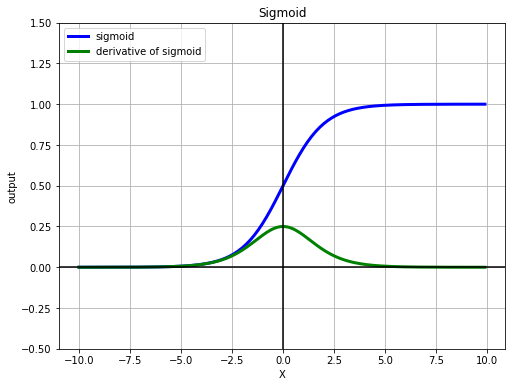

In [ ]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(8, 6))
plt.plot(X, sigmoid(X), label='sigmoid', c='blue', linewidth=3)
plt.plot(X, grad_sigmoid(X), label='derivative of sigmoid', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X')
plt.grid(True)
plt.ylim([-0.5, 1.5])
plt.ylabel('output')
plt.title('Sigmoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## Cost function and Optimization Objective for Logistic Regression

The objective function for logistic regression will be a little different. Instead of minimizing the sigmoid we'll differentiate the negative log of the sigmoid. We do this for a few reasons:
1. Math is easier, all the multiplications are converted to sums
2. Differentiation is easier
3. The function is smooth, hence differentiable.
4. Our probability values can be very low eg. 4e-45 which are messy to deal with, using log on them will convert the values to a more readable form. 
5. If we take only sigmoid, then the resulting function in non-convex function which will have local optimums. Hence, we log it to make it a convex function. 

Our loss function will be:
$$
\begin{equation}
    Cost(h_\theta(x), y)=
    \begin{cases}
        -log(h_\theta(x)), & \text{if}\ y=0 \\
        -log(1 - h_\theta(x)), & \text{if}\ y=1
    \end{cases}
\end{equation}
$$

Where, $h_\theta(x)$ is the sigmoid function
$$h_\theta(x) = \frac{1}{1 + e^{-x}}$$

Instead of writing two separate equations, we'll write it in one sigle form:

$$Cost(h_\theta(x), y) = -ylog(h_\theta(x)) - (1 - y)(log(1 - h_\theta(x)))$$

When y = 0, the left part of the equation automatically becomes 0. When y = 1 the right part of the equation automatically becomes 0. Hence, we have represented the same concept as above in a single equation. The same equation can also be obtained by the principle of __Maximum Likelihood Estimation__. 

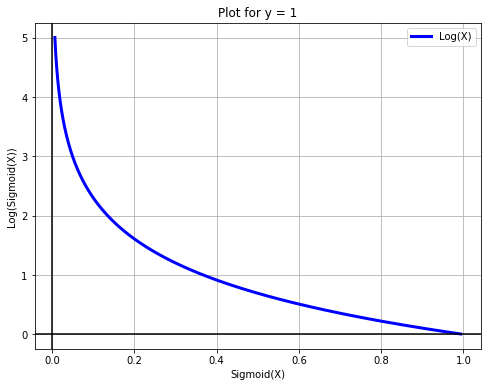

In [ ]:
X = np.arange(-5, 5, 0.01)
fig = plt.figure(figsize=(8, 6))
plt.plot(sigmoid(X), -np.log(sigmoid(X)), label='Log(X)', c='blue', linewidth=3)
plt.legend()
plt.xlabel('Sigmoid(X)')
plt.grid(True)
plt.ylabel('Log(Sigmoid(X))')
plt.title('Plot for y = 1')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

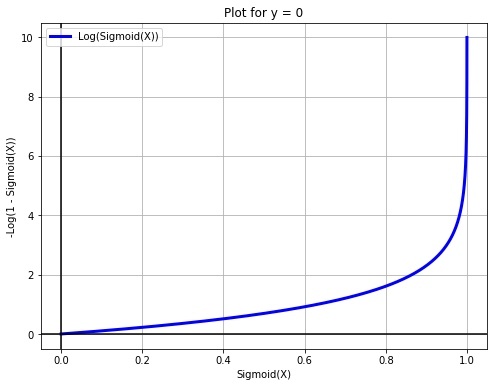

In [ ]:
X = np.arange(-10, 10, 0.01)
fig = plt.figure(figsize=(8, 6))
plt.plot(sigmoid(X), -np.log(1 - sigmoid(X)), label='Log(Sigmoid(X))', c='blue', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('Sigmoid(X)')
plt.grid(True)
plt.ylabel('-Log(1 - Sigmoid(X))')
plt.title('Plot for y = 0')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

  \begin{equation}
    X=
    \begin{cases}
      0, & \text{if}\ a=1 \\
      1, & \text{otherwise}
    \end{cases}
  \end{equation}

## Limitations of Logistic Regression

### Linear Classifier
Despite using the sigmoid non-linearity, the logistic regression classifier is still a ***linear combination*** of the inputs and hence is a **linear classifier**. The interpretation of this while building a classifier is, the classifier will always be a straight line. So when the data is like this:

insert non-linearly separable data here
    
The classifier will output a straight line. 

image here

## Interpretation of Weights

In linear regression we have a simple interpretation. In the equation

$$h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+....$$

The interpretation of the weight is: the change in $y$ by a unit change in $x$, given all the other $x$s remain constant. But this changes a little bit in Logistic Regression. 

We have:

$$ \ln\left(\frac{p}{1-p}\right)=h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+...$$

In a way we can say that Logistic Regression is linear regression on log-odds. So the interpretations of weights now become: the amount of increase in log-odds by a unit change in an $x$ given other $x$s remain constant. 

## Cost function

We've seen that the cost function for logistic regression is:

$$
J\left(\theta\right)=-\frac{1}{m}\sum_{i=0}^m\left[y^{\left(i\right)}\log\left(h_{\theta}\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)\log\left(1-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right]
$$

Where $h_\theta (x^{(i)})$ is the Sigmoid function. In order to get the update rule we need to differentiate this. Firstly, we know that

$$\frac{\partial}{\partial x} \sigma(x) =  \sigma(x) \cdot (1 - \sigma(x))$$

In our case, we want to partial differentiate with respect to our paramters $\theta$. So we have

$$\frac{\partial }{\partial \theta }\sigma \left(f\right)=\sigma \left(f\right)\cdot \left(1-\sigma \left(f\right)\right)\frac{\partial }{\partial \theta }f$$

Where, 
$$f = \left(\theta_0+\theta_1x\right)$$

Hence, 
$$\frac{\partial}{\partial\theta_0}f=1$$
And,
$$\frac{\partial}{\partial\theta_1}f=x$$

But since we can append ones in our input matrix, we can simply replace $x_j$ as 1 in our equation to make life easier, 

$$\frac{\partial }{\partial \theta _j}\sigma \left(x\right)=\sigma \left(x\right)\cdot \left(1-\sigma \left(x\right)\right)x_j)$$

Where $x_j$ will be 1 for $\theta_0$

### Differentiating the negative likelihood

The way we chose to represent our cost function (by taking logs) is called as negative log likelihood. We'll differentiate it now to obtain the update rule


$
\begin{align}
\frac{\partial}{\partial \theta}J(\theta) &= \frac{\partial}{\partial \theta} \left[- \frac{1}{m}\sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))] \right] \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\frac{\partial}{\partial\theta}y^{\left(i\right)}\log\left(h_{\theta}\left(x^{\left(i\right)}\right)\right)+\frac{\partial}{\partial\theta}\left(\left(1-y^{\left(i\right)}\right)\log\left(1-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right)\right] \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\frac{y^{\left(i\right)}}{h_{\theta}\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}h_{\theta}\left(x^{\left(i\right)}\right)+\frac{1-y^{\left(i\right)}}{1-h_{\theta}\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\left(-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right] \\
\text{Replacing h with sigma} \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\frac{y^{\left(i\right)}}{\sigma\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)+\frac{1-y^{\left(i\right)}}{1-\sigma\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\left(-\sigma\left(x^{\left(i\right)}\right)\right)\right]\\
\text{Take the minus sign out} \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\frac{y^{\left(i\right)}}{\sigma\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)-\frac{1-y^{\left(i\right)}}{1-\sigma\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)\right] \\
\text{Take sigma common} \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\left(\frac{y^{\left(i\right)}}{\sigma\left(x^{\left(i\right)}\right)}-\frac{1-y^{\left(i\right)}}{1-\sigma\left(x^{\left(i\right)}\right)}\right)\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)\right] \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\left(\frac{y^{\left(i\right)}-y^{\left(i\right)}\cdot\sigma\left(x^{\left(i\right)}\right)-\sigma\left(x^{\left(i\right)}\right)+y^{\left(i\right)}\cdot\sigma\left(x^{\left(i\right)}\right)}{\sigma\left(x^{\left(i\right)}\right)\cdot\left(1-\sigma\left(x^{\left(i\right)}\right)\right)}\right)\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)\right] \\
\text{Cancel positive and negative terms} \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\left(\frac{y^{\left(i\right)}-\sigma\left(x^{\left(i\right)}\right)}{\sigma\left(x^{\left(i\right)}\right)\cdot\left(1-\sigma\left(x^{\left(i\right)}\right)\right)}\right)\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)\right] \\
\text{We know the gradient of sigma} \\
&=  -\frac{1}{m}\sum_{i=0}^m\left[\frac{y^{\left(i\right)}-\sigma\left(x^{\left(i\right)}\right)}{\sigma\left(x^{\left(i\right)}\right)\cdot\left(1-\sigma\left(x^{\left(i\right)}\right)\right)}\cdot\sigma\left(x^{\left(i\right)}\right)\cdot\left(1-\sigma\left(x^{\left(i\right)}\right)\right)x^{\left(i\right)}_{j}\right] \\
\text{Numerator and Denominator cancel out!} \\
&= -\frac{1}{m}\sum_{i=0}^m\left(y^{\left(i\right)}-\sigma\left(x^{\left(i\right)}\right)\right)x_j^{\left(i\right)}
\end{align} \\
$

## Update Rule for thetas

Taking the negative sign inside in the last equation, we have our update rule

\begin{align*}
& \text{Repeat:} \\
& \quad \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}
^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \\
& \text{until convergence}
\end{align*}

### Implementation using Gradient Descent

In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

df = pd.read_csv('machine_learning_andrewng/ex2data1.csv', header=None)
df.rename(columns={0: 'exam1', 1: 'exam2', 2: 'y'}, inplace=True)
df.head()

,exam1,exam2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


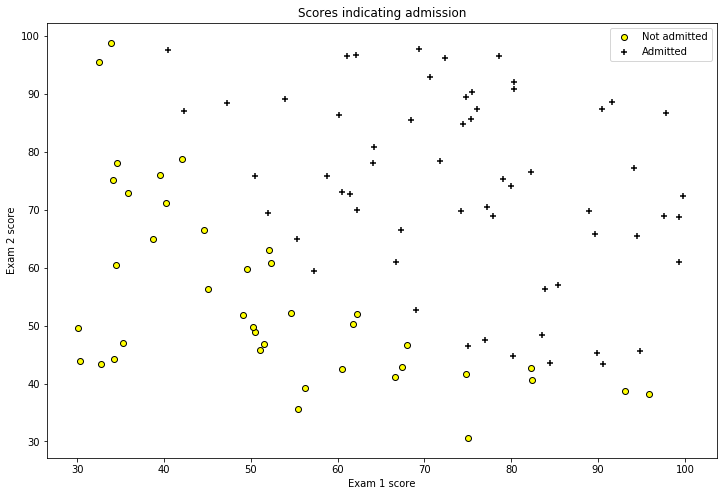

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0]['exam1'], df[df['y'] == 0]['exam2'],
            label='Not admitted', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1]['exam1'], df[df['y'] == 1]['exam2'],
            label='Admitted', marker='+', color='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.title('Scores indicating admission')
plt.show()

In [ ]:
class LogisticRegression(object):
    def __init__(self, X, y, alpha=0.001, n_iterations=5000):
        self.X = self._hstack_one(X)
        self.y = y
        self.thetas = np.zeros((self.X.shape[1]))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print "Cost before fitting: {0:.4f}".format(self.cost())

    @staticmethod
    def _hstack_one(input_matrix):
        if len(input_matrix.shape) == 1:
            return np.hstack((np.array([1]), input_matrix))
        else:
            return np.hstack(
                (np.ones((input_matrix.shape[0], 1)), input_matrix))

    @staticmethod
    def sigmoid(X):
        return 1 / (1 + np.exp(-X))

    def cost(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        dot_prod = self.X.dot(thetas)
        dot_prod_pos = dot_prod[self.y == 1]
        dot_prod_neg = dot_prod[self.y == 0]
        cost = -(1 / self.n_rows) \
               * (np.sum(np.log(self.sigmoid(dot_prod_pos))) 
                  + np.sum(np.log(1 - self.sigmoid(dot_prod_neg))))
        return cost

    def predict(self, new_X, threshold=0.5):
        assert new_X.shape[0] != self.X.shape[1], \
            "Number of features don't match. {0} != {1}"\
                .format(new_X.shape[1], self.X.shape[1])
        new_X = self._hstack_one(new_X)
        h = new_X.dot(self.thetas)
        return self.sigmoid(h) >= threshold

    def batch_gradient(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        h = self.sigmoid(self.X.dot(thetas)) - self.y
        h = np.multiply(self.X, h.reshape(-1, 1))
        h = np.sum(h, axis=0)
        return h

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print "\rIteration: {0} Loss: {1:.5f}".format(i + 1, cost) + "",
        print

    def scipy_optimize(self, ):
        result = minimize(self.cost, self.thetas, jac=self.batch_gradient,
                          options={'maxiter': self.n_iterations})
        print result
        self.thetas = result.x

In [ ]:
lr = LogisticRegression(df[['exam1', 'exam2']].values, df['y'].values, n_iterations=20000, alpha=0.001)
optim_theta = lr.scipy_optimize()
print "Cost after converging: {0:.3f}".format(lr.cost())

Cost before fitting: 0.6931
      fun: 0.20349770159875014
 hess_inv: array([[  2.23242194e+01,  -1.80811824e-01,  -1.92839958e-01],
       [ -1.80811824e-01,   1.53480255e-03,   1.49837589e-03],
       [ -1.92839958e-01,   1.49837589e-03,   1.73637715e-03]])
      jac: array([ -1.21664528e-06,  -7.91537338e-05,  -8.39771285e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 302
      nit: 72
     njev: 285
   status: 2
  success: False
        x: array([-25.16133034,   0.20623169,   0.20147157])
Cost after converging: 0.203


/home/uzumaki/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


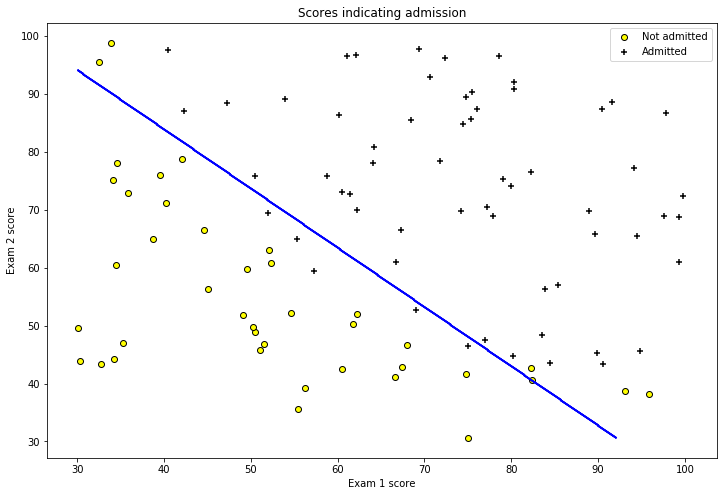

In [ ]:
# Plotting the prediction line
col1 = "exam1"
col2 = "exam2"
min_ex1 = df[col1].min()
max_ex1 = df[col1].max()

min_ex2 = df[col2].min()
max_ex2 = df[col2].max()

arange_step = 0.1

xx, yy = np.meshgrid(np.arange(min_ex1, max_ex1, arange_step), 
                     np.arange(min_ex2, max_ex2, arange_step))
preds = np.c_[xx.ravel(), yy.ravel()]
preds = lr.predict(preds)
preds = preds.reshape(xx.shape)
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0][col1], df[df['y'] == 0][col2],
            label='Not admitted', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1][col1], df[df['y'] == 1][col2],
            label='Admitted', marker='+', color='black')
plt.contour(xx, yy, preds, colors='blue')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.title('Scores indicating admission')
plt.show()

### Implementation using sklearn

Linear Regression cannot be used for yes/no type of outcomes since the output of LR can be over 1 or even negative. The avoid this we use sigmoid function which is a smooth function that has value between 0 and 1 which is used as probabilities. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  2],
       [10, 24]])

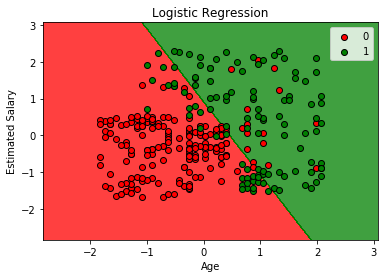

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.legend()
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
clf.score(X_test, y_test)

0.88

## Regularization

Machine Learning models sometimes fit the data too well. This causes a problem because the model won't generalize well with real world data. Consider the following

<img 
src="https://raw.githubusercontent.com/alexeygrigorev/wiki-figures/master/ufrt/kddm/overfitting-logreg-ex.png" 
/>

The $R^2$ value, a commonly used measure to evaluate models, will clearly be high for the model since the data fits very good and the user will be tricked into believing that the mode is perfect but in reality the model is very bad and won't work with unseen data. 

A way to deal with the problem is to use Regularization. There are multiple ways to use Regularization, we'll see that in the following posts.  

Furthermore, Regularization also helps to solve the Bais-Variance tradeoff. 

Source: [ML Coursera](https://www.google.co.in/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjugomJysPYAhUQ4o8KHcqwCs8QFgg-MAA&url=https%3A%2F%2Fwww.coursera.org%2Flearn%2Fmachine-learning&usg=AOvVaw2zgTKaHlTbWua1rRu2TcP9)

## Norms

Norm is nothing but a way to measure distance between two vectors. Generally, it's used to measure the distance between the origin and vector. There are many forms of Norms, but for our purposes, we'll use $L_1$ and $L_2$ norm. 

### $L_1$ Norm or Mean Absolute Error

Consider a vector x = \[B1 B2\] Then the $L_1$ norm is simply the addition of the two numbers inside it. 

Mathematically, $L_1$ Norm is denoted by the following equation

### $$\lVert x \rVert_1=\sum_{i=0}^n\left|x_i\right|$$

### $L_2$ Norm or Root Mean Squared Error

The only difference in the $L_2$ norm is we take the addition of the squares of all the numbers and take its square root. 

Mathematically, $L_2$ Norm is denoted by the following equation

### $$\lVert x \rVert_2 = \sqrt{\sum_{i=0}^nx_i^2}$$


### Example
Consider a vector
$$
x =
    \begin{bmatrix}
    \beta_0 \\
    \beta_1
    \end{bmatrix}
$$

Then $L_1$ norm will be
$$\lVert x \rVert_1= \beta_0 + \beta_1$$

And $L_2$ norm will be
$$\lVert x \rVert_1= \sqrt{\beta_0^2+\beta_1^2}$$

Graphically, if you plot the vector considering $\beta_0$ as x-coordinate and $\beta_1 $as y coordinate. Then $L_1$ norm is simply the addition of the two sides of the traingles formed and $L_2$ is the hypotenuse. The drawing below will make it clear (excuse my poor handwriting :))


<img src="../images/vector_norm.png" height=300 width=500/>

## Adding Regulariaztion Parameter

Consider the cost function of Logistic Regression from the previous post which is given by

$$
J\left(\theta\right)=-\frac{1}{m}\sum_{i=0}^m\left[y^{\left(i\right)}\log\left(h_{\theta}\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)\log\left(1-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right]
$$

We add the term  $\lambda \lVert \theta \rVert_2 ^2$ to it, where $\lambda$ is a constant that user gets to decide. It's also called as __Regularization Parameter__. Mathematically, it's a Lagrange multiplier that's minimising the cost function $J\left(\theta\right)$.

Adding the $\lambda$ term to the equation makes the cost function for Logistic Regression as:

$$J\left(\theta\right)=-\frac{1}{m}\sum_{i=0}^m\left[y^{\left(i\right)}\log\left(h_{\theta}\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)\log\left(1-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right] + 
\lambda \lVert \theta \rVert_2 ^2$$

Note the notation we used, the 2 at the bottom of $\theta$ indicates that's a $L_2$ norm, hence, technically we're using Ridge Regression (We'll see shortly what it is). Normally this piece of notation is ignored since whenever we indicate norm we're almost always using the $L_2$ norm and not the $L_1$ one. But we'll be explicit about it since it's the subtle difference between Ridge and Lasso Regression. 

#### Note:
If $\lambda$ is:
1. __too high__: The values will be heavily penalized and __underfitting__ will occur. 
2. __too low__: There'll be no regularization, we'll be where we started from and the model will __overfit__. 



## Types of Regularization

Two types of Regularization we'll see are Ridge, and LASSO. 

### 1. Ridge
Notice how in the above equation we used $L_2$ norm. That's the key point of Ridge Regularization. 

### 2. LASSO (Least Absolute Shrinkage and Selection Operator)
Here instead of the $L_2$ norm, we take $L_1$ norm. This type of regularization is rarely used. 

### 3. ElasticNet
This combines both Ridge and LASSO hence uses both $L_1$ and $L_2$ norms. 

## When to use $L_1$ (MAE) vs $L_2$ (RMSE) 

Since RMSE squares the differences this has the effect of penalizing large errors more than lower errors. For instance penalizing an error of 10 is __more than twice__ than penalizing the error of 5. 

But in the case of MAE penalizing an error of 10 is __twice__ the penalizing the error of 5. Hence whenever you want to penalizing linearly you ought to choose MAE over RMSE else the other way around. 

## Polynomial Regression

Polynomial Regression is the same as Linear Regression but we're adding polynomial features to the dataset. For instance if we have two features $x_1$, and $x_2$. We'll add $x_1^2$, $x_2^2$, $x_1x_2$, $x_1^3$ and so on. Adding these features will give us a non-linear fit, i.e. a boundary that's not simple plain line. 

In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

df = pd.read_csv('machine_learning_andrewng/ex2data2.csv', header=None)
df.rename(columns={0: 'chip1', 1: 'chip2', 2: 'y'}, inplace=True)
df.head()

,chip1,chip2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


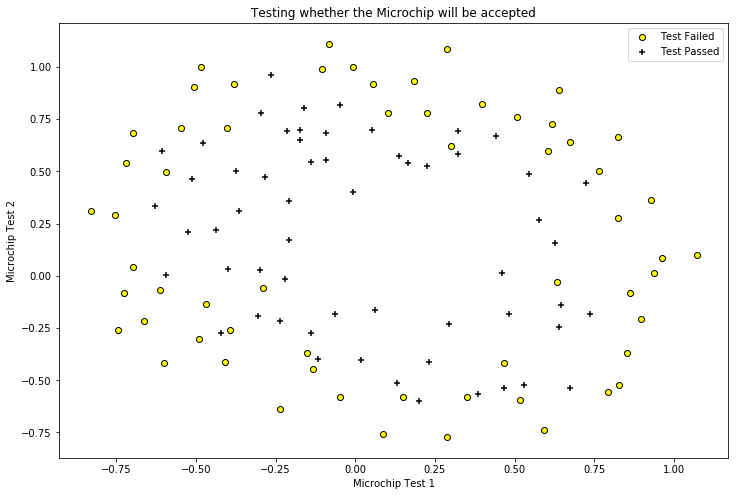

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0]['chip1'], df[df['y'] == 0]['chip2'],
            label='Test Failed', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1]['chip1'], df[df['y'] == 1]['chip2'],
            label='Test Passed', marker='+', color='black')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')
plt.title('Testing whether the Microchip will be accepted')
plt.show()

In [ ]:
class LogisticRegression(object):
    def __init__(self, X, y, alpha=0.001, n_iterations=5000,
                 lambda_param=0, verbose=True):
        self.y = self._handle_data_type(y)
        self.X = self._handle_data_type(X)
        self.X = self._hstack_one(X)
        self.thetas = np.zeros((self.X.shape[1]))
        self.n_rows = self.X.shape[0]
        self.n_features = self.thetas.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.lambda_param = lambda_param
        if verbose:
            print "Number of features: {0}".format(self.n_features - 1)
            print "Cost before fitting: {0:.4f}".format(self.cost())
    
    @staticmethod
    def _handle_data_type(new_X):
        return new_X
    
    @staticmethod
    def _hstack_one(input_matrix):
        if len(input_matrix.shape) == 1:
            return np.hstack((np.array([1]), input_matrix))
        else:
            return np.hstack((np.ones((input_matrix.shape[0], 1)), input_matrix))
        
    @staticmethod
    def sigmoid(X):
        return 1/(1 + np.exp(-X))
        
    def cost(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        dot_prod = self.X.dot(thetas)
        dot_prod_pos = dot_prod[self.y == 1]
        dot_prod_neg = dot_prod[self.y == 0]
        # TODO: Add limit parameter to prevent
        # log underflow
        # https://stackoverflow.com/a/47244817/1878563
        cost = -(1/self.n_rows) * (np.sum(np.log(self.sigmoid(dot_prod_pos))) \
                                + np.sum(np.log(1 - self.sigmoid(dot_prod_neg)))) \
                         + (self.lambda_param/(2*self.n_rows)) \
                     * np.sum(self.thetas[1:]**2)
        return cost
    
    def predict(self, new_X, threshold=0.5):
        new_X = self._handle_data_type(new_X)
        assert new_X.shape[0] != self.X.shape[1], \
            "Number of features don't match. {0} != {1}".format(new_X.shape[1],
                                                                self.X.shape[1])
        new_X = self._hstack_one(new_X)
        h = new_X.dot(self.thetas)
        results = self.sigmoid(h) >= threshold
        return results
    
    def batch_gradient(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        h = self.sigmoid(self.X.dot(thetas)) - self.y
        h = np.multiply(self.X, h.reshape(-1, 1))
        h = np.sum(h, axis=0)
        reg = thetas * self.lambda_param
        reg[0] = 0 # don't regularize theta_0
        h += reg
        return h
    
    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha/self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print "\rIteration: {0} Loss: {1:.5f}".format(i + 1, cost)  + "",
        print
    
    def scipy_optimize(self, verbose=True):
        result = minimize(self.cost, self.thetas, jac=self.batch_gradient, 
                          options={'maxiter': self.n_iterations})
        if verbose:
            print result
        self.thetas = result.x

### Simple Logistic Regression

In [ ]:
simple_lr = LogisticRegression(df[['chip1', 'chip2']].values, df['y'].values, n_iterations=20000)
simple_lr.scipy_optimize()

Number of features: 2
Cost before fitting: 0.6931
      fun: 0.69024112201698
 hess_inv: array([[ 0.03954989, -0.0116338 , -0.02684334],
       [-0.0116338 ,  0.14515993,  0.02196225],
       [-0.02684334,  0.02196225,  0.14320469]])
      jac: array([ -8.04472319e-06,  -5.74084101e-07,  -1.09410551e-06])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 48
     njev: 165
   status: 0
  success: True
        x: array([-0.01418441, -0.30352114, -0.01813174])


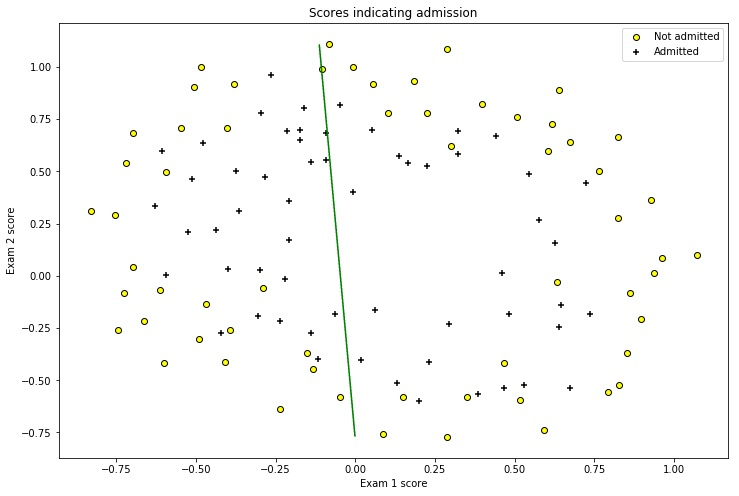

In [ ]:
# Plotting the prediction line
def plot(col1, col2, clf):
    min_ex1 = df[col1].min()
    max_ex1 = df[col1].max()

    min_ex2 = df[col2].min()
    max_ex2 = df[col2].max()

    arange_step = 0.001

    xx, yy = np.meshgrid(np.arange(min_ex1, max_ex1, arange_step), 
                         np.arange(min_ex2, max_ex2, arange_step))
    preds = np.c_[xx.ravel(), yy.ravel()]
    preds = clf.predict(preds)
    preds = preds.reshape(xx.shape)
    fig = plt.figure(figsize=(12, 8))
    plt.scatter(df[df['y'] == 0][col1], df[df['y'] == 0][col2],
                label='Not admitted', color='yellow', edgecolor='black')
    plt.scatter(df[df['y'] == 1][col1], df[df['y'] == 1][col2],
                label='Admitted', marker='+', color='black')
    plt.contour(xx, yy, preds, [0.5], colors='green')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(loc='upper right')
    plt.title('Scores indicating admission')
    plt.show()
    
plot("chip1", "chip2", simple_lr)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = df[['chip1', 'chip2']].values
kernel = PolynomialFeatures(6)
X = kernel.fit_transform(X)
X = X[:, 1:]
y = df['y'].values
print X.shape
poly_lr = LogisticRegression(X, y, lambda_param=100, n_iterations=20000)
poly_lr.scipy_optimize()

(118, 27)
Number of features: 27
Cost before fitting: 0.6931
      fun: 0.6802434024711351
 hess_inv: array([[  4.23984171e-02,  -1.71383426e-02,  -2.38290924e-04,
          2.02861892e-02,  -6.47610740e-03,   1.91629457e-02,
         -9.82653723e-03,   1.15108124e-03,  -6.28776882e-04,
         -9.07568393e-03,   2.63613455e-03,  -2.90371388e-03,
          3.82792244e-03,  -2.61956629e-03,  -5.14944483e-03,
         -8.39710563e-03,   3.99420393e-05,  -5.48575475e-04,
         -5.21552667e-06,  -3.66343522e-04,  -1.59309471e-02,
         -3.17290267e-03,  -1.79242705e-03,   1.19858370e-03,
         -9.13433031e-04,   4.91298557e-04,  -1.54604264e-03,
         -1.54675705e-02],
       [ -1.71383426e-02,   5.12692985e-01,  -1.18408858e-01,
         -1.82832779e-01,   1.28144257e-01,  -1.17568724e-01,
         -2.81545853e-01,   5.64146455e-02,  -4.17312757e-02,
          5.04789812e-02,  -5.61753462e-02,   1.09395661e-02,
          2.47817442e-02,   2.63464881e-02,   9.62040081e-02,
   

/home/uzumaki/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


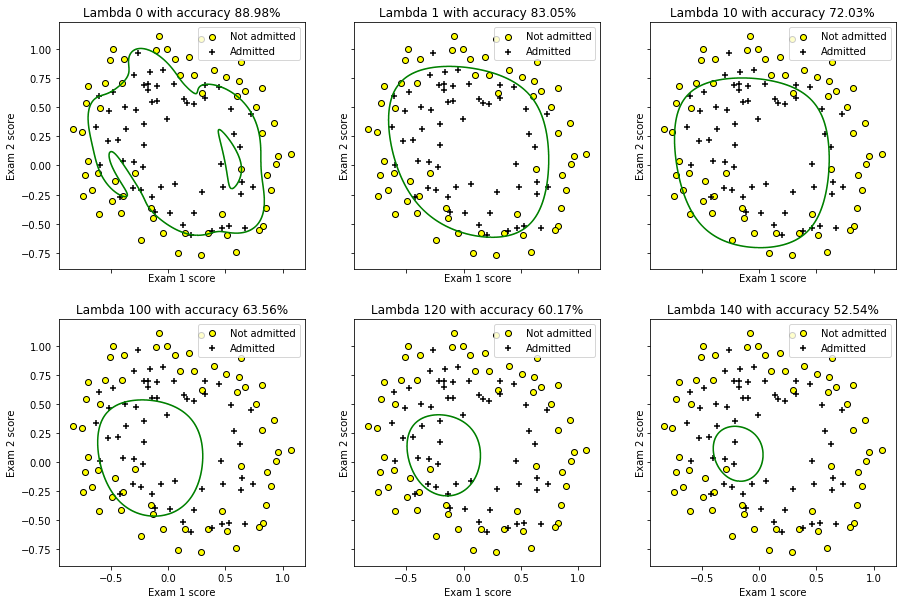

In [ ]:
# visualizing the effect
X = df[['chip1', 'chip2']].values
kernel = PolynomialFeatures(6)
X = kernel.fit_transform(X)
X = X[:, 1:]
y = df['y'].values

col1 = "chip1"
col2 = "chip2"
min_ex1 = df[col1].min()
max_ex1 = df[col1].max()
min_ex2 = df[col2].min()
max_ex2 = df[col2].max()
arange_step = 0.001
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 10))
xx, yy = np.meshgrid(np.arange(min_ex1, max_ex1, arange_step), 
                        np.arange(min_ex2, max_ex2, arange_step))

lambdas = [0, 1, 10, 100, 120, 140]
for index, lambda_param in enumerate(lambdas):
    poly_lr = LogisticRegression(X, y, lambda_param=lambda_param, verbose=False)
    poly_lr.scipy_optimize(verbose=False)
    preds = np.c_[xx.ravel(), yy.ravel()]
    accuracy = 100*(np.sum(poly_lr.predict(X) == y)/y.size)
    preds = kernel.transform(preds)
    preds = preds[:, 1:]
    preds = poly_lr.predict(preds)
    preds = preds.reshape(xx.shape)
    fl_axes = axes.flatten()[index]
    fl_axes.scatter(df[df['y'] == 0][col1], df[df['y'] == 0][col2],
                    label='Not admitted', color='yellow', edgecolor='black')
    fl_axes.scatter(df[df['y'] == 1][col1], df[df['y'] == 1][col2],
                    label='Admitted', marker='+', color='black')
    fl_axes.contour(xx, yy, preds, [0.5], colors='green')
    fl_axes.set_xlabel('Exam 1 score')
    fl_axes.set_ylabel('Exam 2 score')
    fl_axes.legend(loc='upper right')
    fl_axes.set_title("Lambda {0} with accuracy {1:.2f}%".format(lambda_param, accuracy))
plt.show()

## KNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # p = 1 is manhattan distance, p = 2 is Euclidean
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[60,  3],
       [ 6, 31]])

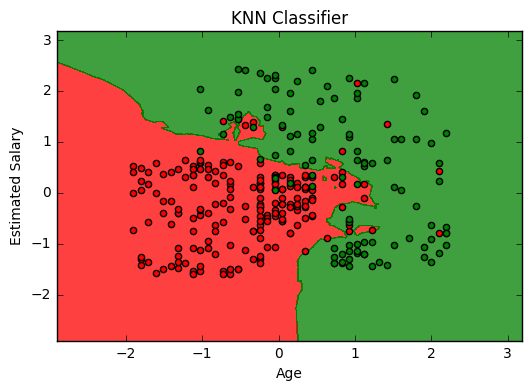

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('KNN Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

## Support Vector Machines

SVM will try to divide your data into 2 using a hyperplane in n-dimensional space. It tries to separate the data by making the margin between two as wide as possible. That's the reason it's also called Large Margin Classifier. 

Some of SVM hyperparameters are:
1. C : C is the penalty term that makes the decision boundary smoother/wiggly. This is a trade-off between making the model more stable vs more accurate. A smaller value will make the boundary smoother while a high C value will try to classify all the examples correctly and lead to non-smooth curves. 

2. gamma : gamma value indicates the influence of single variable. A small gamma value indicates that a variable has influence over long distances. That is, it will play a role in deciding the class of another point even if that another point is far away from the current point. Inversely, large gamma value will indicate lower influence. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [ ]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0).fit(X_train, y_train)


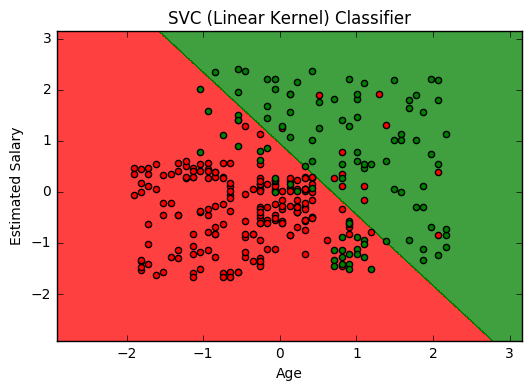

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (Linear Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  1],
       [17, 24]])

In [ ]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='rbf', random_state=0).fit(X_train, y_train)


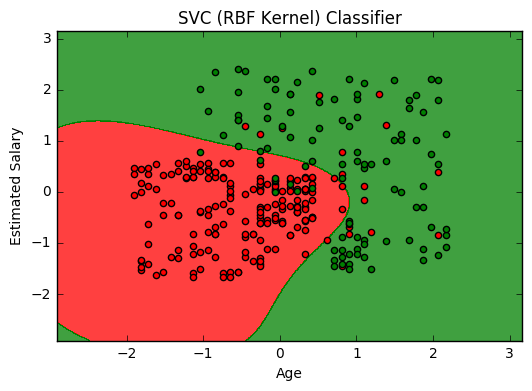

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (RBF Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  4],
       [ 3, 38]])

In [ ]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='poly', random_state=0).fit(X_train, y_train)


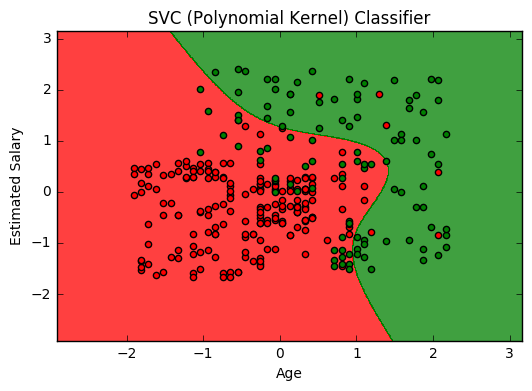

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('SVC (Polynomial Kernel) Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  1],
       [14, 27]])

## Kernel method

The data is sometimes not linearly separable (like the case above) so the kernel trick is to map this space into higher dimension, where they are linearly separable. Then mapping the classification back into the original space gives non-linear classifier

This mapping function that maps lower dimensional data to higher is called as the kernel.

### Problem
The problem with converting lower to higher dimension and then back to lower is computationally intensive. To deal with it we use something called as "Kernel Trick"

### Radial Basis Function (Gaussian Function) and Kernel Trick
RBF function maps data from lower to higher dimension by using landmarks which are the centre point of the bell curve. The points far from the landmark get a value of 0 and the ones close to it git high values. That's the reason it separates the data in higher dimension without actally mapping the points in higher dimension. This data which is linearly separable in higher dimension, which when mapped to lower dimension, gives rise to non linear models.  

RBF function is not the only kernel function, there are many more
1. Sigmoid Kernel
2. Polynomial Kernel

# Naive Bayes

Naive Bayes uses Bayes Theorem to find out the best hypothesis given data. Bayes Theorem states:
$$P\left(X \ | \ Y\right)=\frac{P\left(Y \ | \ X\right)\cdot P\left(X\right)}{P\left(Y\right)}$$

Where,

1. P(X|Y) is the posterior probability
2. P(Y|X) is the probability assuming that the hypothesis were true. 
3. P(X) is the prior probability which is irrespective of data. 
4. P(Y) is probability of the data, irrespective of hypothesis. 

Once we have these probabilities, in the end we choose the hypothesis with the maximum probability. This is also called as __Maximum A Posteriori (MAP) Estimation__

### Naive Bayes is called "Naive" ?

Naive Bayes classifier assumes that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 4" in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier considers all of these properties to independently contribute to the probability that this fruit is an apple.

While calculating P(Y|X) we simply multiply the terms, eg P(Y0, Y1, Y2 | X) = P(Y0|X) \* P(Y1|X) \* P(Y2|X). Here we assume independce between Y0, Y1 etc. which may or may not be true. 

## Gaussian Naive Bayes

While calculating P(Y|X) we assume the features are categorical, so we can count things. But if there are real valued numbers, we instead take the pdf of the number. We fit a gaussian to the given dataset and take it's pdf instead of P(Y|X)

$$P\left(X \ | \ Y\right)=\frac{PDF\left(Y \ \vert \ X \right)\cdot P\left(X\right)}{PDF\left(Y\right)}$$

### Generative vs Discriminative Model

Genrative models: they try to mimic the underlying process which generated the dataset. 

Disriminative models: these models don't have anything with how the data is generated, they will simply classify things. 

For more read: https://stackoverflow.com/a/879591/1878563

Naive Bayes is a discriminative model

## Decision Trees

Decision trees are basically just nested if statements. The conditions in this if statements are what are learned by techniques that are rooted in Information Theory. 


### Information Theory
We measure weight by kilos, and water by litres, but how to measure information? The answer is Information Entropy. For instance, a page of a random book has more Entropy than the book itself because there's a lot of randomness in the page. On the other hand all the information is present in the book so it's obvious (less random = less Entropy)  


Entropy is used to choose the best splits in the DT. Our motive is to choose a split that maximizes the reduction in uncertainity. Eg: going from 50% certain to 100% certain is better than going from 50% to 75%. It is also related to variance. More variance = more uncertainity = more entropy. However, there's a subtle difference when both are used in multimodal distributions. In that, variance depends on where the peaks are, but entropy doesn't care. 

$$H(p) = \mathbb{E}(-log_2(p))$$

Also, denoted by

$$H(p) = -\sum p*log(p)$$

## Maximizing Information Gain

One of the algorithms that is used to create the decision tree is called ID3. It will recursively divide the tree into 2 by selecting the feature that will maximise the IG. For instance, if we have 2 features, it will split by both and check which of the features gave more IG. 

### Regularizing 
We can easily get 100% training accuracy by creating a decision tree of arbitrary length. We can avoid this by setting a max_depth parameter. 

### Algorithm for splitting

1. Sort X's for current column in order, sort Y in the same way
2. Find all boundary points where Y changes from one value to another
3. Calculate IG when splitting at each boundary
4. Keep the split which gives max IG

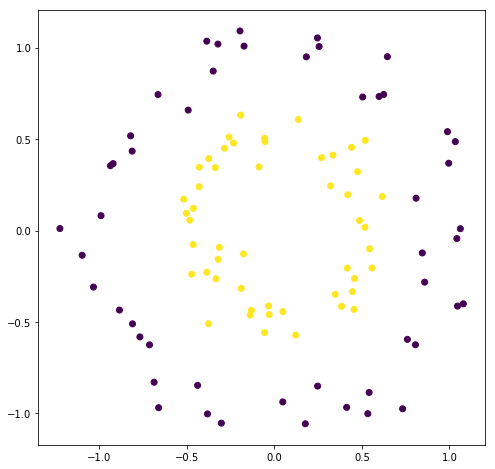

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

fig = plt.figure(figsize=(8, 8))
X, y = make_circles(factor=0.5, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
class TreeNode:
    def __init__(self, curr_depth=0, max_depth=None):
        self.curr_depth = depth
        self.max_depth = max_depth
    
    def fit(self, X, y):
        # Base case: if length is 1, or there's only 1 label
        # return the label
        if len(y) == 1 or len(set(y)) == 1:
            self.column = None
            self.split = None
            self.left = None
            self.right = None
            self.prediction = y[0]
        else:
            # find the best row for splitting
            columns = X.shape[1]
            max_ig = 0
            best_col = None
            best_split = None
            for col in range(columns):
                # for every column calculate the max
                # information gain. If it's better than
                # the current max, update it
                ig, split = self.find_split(X, y, col)
                if ig > max_ig:
                    max_ig = ig
                    best_col = col
                    best_split = split
            
            # this case is for 50-50 split when nothing
            # can be done, another base case
            if max_ig == 0:
                self.col = None
                self.split = None
                self.left = None
                self.right = None
                self.prediction = np.round(y.mean())
            else:
                # keep track of best column and best split
                self.column = best_col
                self.split = best_split
            
            # check if we're at max depth case, if yes
            # then stop here and save mean predictions
            if self.curr_depth == self.max_depth:
                self.left = None
                self.right = None
                self.prediction = [
                    # one for the left node: predict the mean y values
                    # where the X values are less than the split
                    np.round(y[X[:, best_col] < self.split].mean()),
                    # same goes for right
                    np.round(y[X[:, best_col] >= self.split].mean())
                ]
            else:
                # recurse
                left_indices = X[:, best_col] < best_split
                X_left = X[left_indices]
                y_left = y[left_indices]
                # create a new node
                self.left = TreeNode(self.depth + 1, self.max_depth)
                self.left.fit(X_left, y_left)
                
                # same for right
                right_indices = X[:, best_col] >= best_split
                X_right = X[right_indices]
                y_right = y[right_indices]
                # create a new node
                self.right = TreeNode(self.depth + 1, self.max_depth)
                self.right.fit(X_right, y_right)
    
    def find_split(self, X, y, col):
        x_values = X[:, col]
        sort_idx = np.argsort(x_values)
        x_values = x_values[sort_idx]
        y_values = y[sort_idx]
        boundaries = np.nonzero(y_values[:-1] != y_values[1:])
        print("BS: {}".format(boundaries.shape))
        best_split = None
        max_ig = 0
        for boundary in boundaries:
            # average the current and next x value to get the split
            # the rule will be:
            # 1. on the left: data < split
            # 2. on the right: data >= split
            split = (X[boundary] + X[boundary + 1]) / 2
            ig = self.information_gain(X, y, split)
            if ig > max_ig:
                best_split = boundary
                max_ig = ig
        return max_ig, best_split
    
    def binary_entropy(y):
        p1 = (y==1).sum() / len(y)
        p0 = 1 - p1
        if p1 == 1 or p1 == 0:
            return 0
        else:
            return -p1 * np.log2(p1) - p0 * np.log2(p0)
    
    def information_gain(self, X, y, split):
        # y for inputs less than split, left node of the tree
        y0 = y[x < split]
        # same for right node
        y1 = y[x >= split]
        N = len(y)
        y0len = len(y0)
        # base case where the split is in the beginning
        # or the end
        if y0len == 0 or y0len == N:
            return 0
        p0 = len(y0) / N
        p1 = 1 - p0
        return self.binary_entropy(y) - p0 * binary_entropy(y0) - p1 * binary_entropy(y1)

array([[ 3.88016245e-01, -8.99625138e-01],
       [-1.18260769e+00, -3.92983039e-01],
       [ 2.45216150e-01,  1.26701165e+00],
       [ 7.01516015e-01, -3.81699322e-01],
       [-9.05108010e-01, -1.00148683e-01],
       [-2.40956666e-01, -7.85282131e-01],
       [ 8.48394084e-01, -3.74383852e-01],
       [ 2.24616231e-01, -7.15502842e-01],
       [-4.70968643e-01, -5.16717786e-01],
       [ 7.17571512e-02,  2.70507493e-01],
       [-1.09066653e+00,  7.13100968e-01],
       [-5.35757281e-01,  2.58423663e-01],
       [ 1.17326843e-01, -5.41469465e-01],
       [ 4.65277141e-01, -1.75686923e-01],
       [-3.86572238e-01, -1.38370273e-01],
       [ 9.27492646e-01,  3.61451652e-01],
       [-6.99206490e-01,  1.52112219e-01],
       [ 9.48195394e-01, -3.40036588e-01],
       [-4.37169651e-02, -2.26797578e-01],
       [ 6.59585719e-01,  7.34674399e-02],
       [-8.29394550e-01,  8.08061876e-02],
       [-8.03127452e-04,  6.25712234e-01],
       [-4.82438646e-01, -5.10197984e-01],
       [-4.

In [ ]:
y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
np.nonzero(y[:-1] != y[1:])

(array([2, 5, 6, 7, 8], dtype=int64),)

In [ ]:
s = np.argsort(x)

In [ ]:
x[s]

array([5, 7, 9, 9])

In [ ]:
s

array([1, 3, 0, 2], dtype=int64)

In [ ]:
x[[1, 3, 0, 2]]

array([5, 7, 9, 9])

## Random Forest Intuition:
1. Take K random points from dataset.
2. Build Decision Tree based on these K points. 
3. Choose the number of trees you want to build and repeat steps 1 and 2. 
4. For a new point, make each tree predict the output and assign the majority vote. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# we're scaling here in order to visualize it easily
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

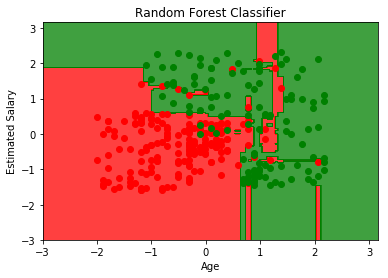

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Random Forest Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[63,  5],
       [ 3, 29]])

### Implementation of Logistic Regression

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("machine_learning_lazy/ecommerce_data.csv")
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [ ]:
# one hot encode
df = pd.get_dummies(df, columns=["time_of_day"])
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,user_action,time_of_day_0,time_of_day_1,time_of_day_2,time_of_day_3
0,1,0,0.657510,0,0,0,0,0,1
1,1,1,0.568571,0,1,0,0,1,0
2,1,0,0.042246,1,0,0,1,0,0
3,1,1,1.659793,1,2,0,1,0,0
4,0,1,2.014745,1,2,0,1,0,0


In [ ]:
def get_data():
    val = df.values
    X = np.concatenate((val[:, :4], val[:, 5:]), axis=1)
    y = val[:, 4]
    
    # normalize numerical columns
    X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    X[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
    
    # get only binary data
    X = X[y <= 1]
    y = y[y <= 1]
    return X, y

X, y = get_data()

In [ ]:
dim = X.shape
# randomly initialize weights
W = np.random.randn(dim[1]).reshape(-1, 1)
# bias
b = 0

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward():
    return sigmoid(X.dot(W) + b)

def classify():
    y_hat = forward()
    y_hat = np.round(y_hat)
    print("Accuracy: {0:.2f} %".format((np.sum(y_hat.flatten() == y) / len(y_hat)) * 100))

In [ ]:
classify()

Accuracy: 53.52 %


In [ ]:
len(y_hat)

398

In [ ]:
y_hat == y

array([[ True, False,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [False,  True, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [ True, False,  True, ...,  True,  True,  True],
       [False,  True, False, ..., False, False, False]])

In [ ]:
np.sum(y_hat.flatten() == y) / len(y_hat)

0.535175879396985

In [ ]:
y

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0.

## Optimizing $\alpha$ value for Ridge

Ridge is nothing but Regularized version of Least Squares. Often we don't know which value of $\alpha$ would give us the best results. What we can do is try out with different values and then select the one with the best cross-validation accuracy. 

In [ ]:
# Create made up data
import numpy as np

from sklearn.datasets import make_regression

X, y = make_regression(n_features=3, effective_rank=2, noise=10)
# effective rank is the number of variables that 
# are enough to describe the input variables. Hence most 
# of the input data will be linear combination of these
# singluar vectors. Rest of the variables will be fairly
# irrelevant to the output. 

# noise is the standard deviation of the gaussian applied to
# output

In [ ]:
alpha_grid = np.linspace(0.1, 1, 10)
alpha_grid

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [ ]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=alpha_grid, store_cv_values=True)
clf.fit(X, y)
print("Best alpha: {}".format(clf.alpha_))
print("Costs: {}".format(clf.cv_values_[:2]))

Best alpha: 0.1
Costs: [[ 122.02900475  117.88653491  114.68338853  112.11919036  110.01323844
   108.24900681  106.74737894  105.45245426  104.32345958  103.32987127]
 [  40.10985911   29.2329253    21.84018491   16.62836218   12.84723406
    10.0401097     7.91642622    6.28452633    5.01412181    4.0143423 ]]


It will internally run multiple iterations of cross validation and select the alpha with least average cost. 

## Scoring with Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error, make_scorer
l1_error = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
clf = RidgeCV(alphas=alpha_grid, store_cv_values=True, scoring=l1_error)
clf.fit(X, y)
print("Best alpha: {}".format(clf.alpha_))
print("Costs: {}".format(clf.cv_values_[:2]))

Best alpha: 0.1
Costs: [[ 1.78981083  1.60069349  1.45216994  1.33177187  1.23185649  1.1474152
   1.07499923  1.01214145  0.95702254  0.90826707]
 [ 8.01265854  7.08617217  6.35277241  5.75721293  5.26372789  4.84803726
   4.49303849  4.1863198   3.91864753  3.68300641]]


While the best alpha is same, the error are relatively smaller. This is because of the fact that by defualt RMSE is used (in the previous example) and in the last example we've used MAE

Same technique is also applicable to __Lasso__ and __LassoCV__